<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

![](https://victorzhou.com/media/nn-series/network.svg)

# Setup

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Softmax
from tensorflow.keras.utils import to_categorical

# Data

In [3]:
mnist = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
(X_train, y_train), (X_test, y_test) = mnist

In [5]:
print(f'Training Images {X_train.shape}, Labels {y_train.shape}')
print(f'Testing  Images {X_test.shape}, Labels {y_test.shape}')

Training Images (60000, 28, 28), Labels (60000,)
Testing  Images (10000, 28, 28), Labels (10000,)


## Example

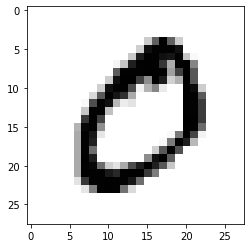

In [7]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

## Preprocess
* Flatten and scale data
* Note:  We lose information when we flatten

In [8]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float32')

In [9]:
X_train /= 255
X_test  /= 255

## Labels

In [10]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# Learning Objective
* We have 60,000 28 x 28 pixel images in a training set
* We want to learn how to identify the number in each image

## Gradient Descent

* Gradient Descent uses all the data in each epoch before updating
* Can be hard to break out of local minima
* Training data rarely fits in available memory

## Stochastic Gradient Descent
* Update after each training example
* Online learning
* High variance - training can be inefficient

## Batch Gradient Descent
* By updating over each batch, we get an averaging of errors
* Averaging errors helps smooth the error surface
* Results in a fewer local minima traps
* Recommendation start at 32 or 64 then move by multiples of two up or down to fit memory

In [14]:
batch_size = 64
epochs=100

# Metrics

In [16]:
results_df = pd.DataFrame(columns=['Loss', 'Accuracy'])

In [49]:
def plot_accuracy(history, ax, color='b'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    ax.plot(epochs, acc, 'bo', color=color, label='Train')
    ax.plot(epochs, val_acc, 'b', color=color, label='Validation')
    ax.set_title('Training & Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.legend()
    
def plot_loss(history, ax, color='b'):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    ax.plot(epochs, loss, 'bo', color=color, label='Train')
    ax.plot(epochs, val_loss, 'b', color=color, label='Validation')
    ax.set_title('Training & Validation Loss')
    ax.set_xlabel('Epochs')
    ax.legend()

## Softmax
* Activation function that squashes the output between 0 and 1
* Designed to maximize the most likely class
* Provides an interpretable probability of being a class

![](https://lh6.googleusercontent.com/3vcfJ5hJhsMZAMFIbQOEycfVW1t6rh1CXt62DeMk8RPPXVzV4vCcURNm_z_F7618uAeSHT7qT7wE_UiK5Ic0b-Eeuunn6iTGeHWbpAaUAP6-G2ePubeGWCb4_TmSapeaimZqvuUs)

## Logits -> Softmax

In [84]:
z = [-3, 2, 5, 1]
s = np.exp(z) / np.sum(np.exp(z))
for val, soft in zip(z, s):
  print(f'{val}\t{soft:.3f}')

-3	0.000
2	0.047
5	0.936
1	0.017


## Categorical CrossEntropy
* Used as a loss function for multi-class classification
* Often paired with softmax activation

![](https://miro.medium.com/max/1122/1*wcTVsYh3d4IQnYcUGdu66Q@2x.png)

## Softmax -> Loss

In [117]:
pred = s
act  = [0, 1, 0, 0]

loss = - np.sum(act * np.log(pred)) / len(act)
print(f'Loss {loss:.3f}')

Loss 0.767


In [116]:
pred = s
act  = [0, 0, 1, 0]

loss = - np.sum(act * np.log(pred)) / len(act)
print(f'Loss {loss:.3f}')

Loss 0.017


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwe_aIg3_aqanrEIb66lMQNS92vHcYaV5WuoyztOFuLWUMQ6dUhkrnzeehNbb8Hh8dhxY&usqp=CAU)

# Shallow Network

In [20]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


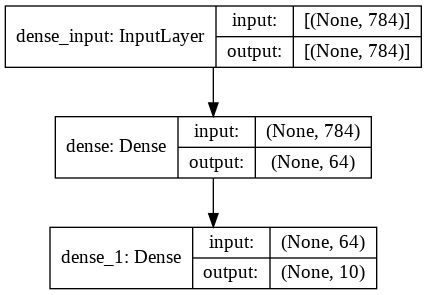

In [25]:
keras.utils.plot_model(model, show_shapes=True)

In [26]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history_shallow = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/100
844/844 [==============================] - 3s 2ms/step - loss: 1.8843 - accuracy: 0.5928 - val_loss: 1.4696 - val_accuracy: 0.7862
Epoch 2/100
844/844 [==============================] - 2s 3ms/step - loss: 1.2454 - accuracy: 0.7822 - val_loss: 0.9799 - val_accuracy: 0.8470
Epoch 3/100
844/844 [==============================] - 3s 4ms/step - loss: 0.9073 - accuracy: 0.8252 - val_loss: 0.7355 - val_accuracy: 0.8735
Epoch 4/100
844/844 [==============================] - 4s 5ms/step - loss: 0.7332 - accuracy: 0.8455 - val_loss: 0.6025 - val_accuracy: 0.8873
Epoch 5/100
844/844 [==============================] - 4s 5ms/step - loss: 0.6316 - accuracy: 0.8582 - val_loss: 0.5213 - val_accuracy: 0.8937
Epoch 6/100
844/844 [==============================] - 3s 4ms/step - loss: 0.5657 - accuracy: 0.8680 - val_loss: 0.4670 - val_accuracy: 0.8980
Epoch 7/100
844/844 [==============================] - 4s 4ms/step - loss: 0.5193 - accuracy: 0.8745 - val_loss: 0.4284 - val_accuracy: 0.9027

In [28]:
loss_shallow, accuracy_shallow = model.evaluate(X_test, y_test)
results_df.loc['Shallow'] = [loss_shallow, accuracy_shallow]
print(f'Test Loss {loss_shallow}, Accuracy {accuracy_shallow}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9444
Test Loss 0.19335225224494934, Accuracy 0.9444000124931335


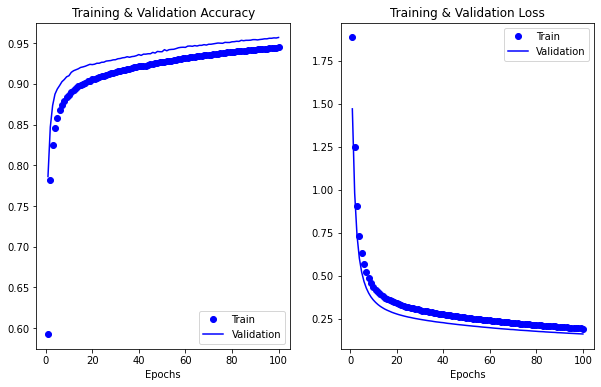

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
plot_accuracy(history_shallow, ax[0])
plot_loss(history_shallow, ax[1])

# Intermediate Network

In [51]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


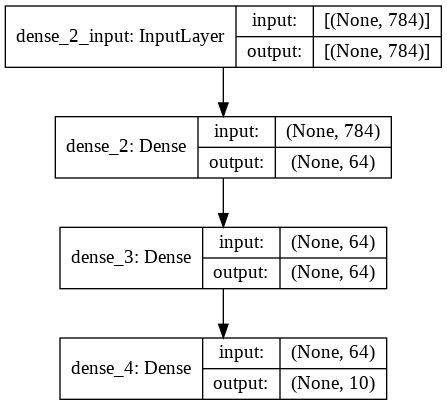

In [53]:
keras.utils.plot_model(model, show_shapes=True)

In [54]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history_intermediate = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/100
844/844 [==============================] - 3s 3ms/step - loss: 2.2687 - accuracy: 0.2120 - val_loss: 2.2196 - val_accuracy: 0.4267
Epoch 2/100
844/844 [==============================] - 2s 2ms/step - loss: 2.1686 - accuracy: 0.4593 - val_loss: 2.0933 - val_accuracy: 0.5832
Epoch 3/100
844/844 [==============================] - 2s 2ms/step - loss: 2.0000 - accuracy: 0.5601 - val_loss: 1.8632 - val_accuracy: 0.5643
Epoch 4/100
844/844 [==============================] - 2s 3ms/step - loss: 1.7316 - accuracy: 0.6033 - val_loss: 1.5577 - val_accuracy: 0.6340
Epoch 5/100
844/844 [==============================] - 3s 4ms/step - loss: 1.4492 - accuracy: 0.6526 - val_loss: 1.2916 - val_accuracy: 0.7203
Epoch 6/100
844/844 [==============================] - 3s 3ms/step - loss: 1.2221 - accuracy: 0.7062 - val_loss: 1.0829 - val_accuracy: 0.7505
Epoch 7/100
844/844 [==============================] - 2s 2ms/step - loss: 1.0451 - accuracy: 0.7434 - val_loss: 0.9191 - val_accuracy: 0.8055

In [57]:
loss_intermediate, accuracy_intermediate = model.evaluate(X_test, y_test)
results_df.loc['Intermediate']= [loss_intermediate, accuracy_intermediate]
print(f'Test Loss {loss_intermediate}, Accuracy {accuracy_intermediate}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1849 - accuracy: 0.9459
Test Loss 0.18493464589118958, Accuracy 0.945900022983551


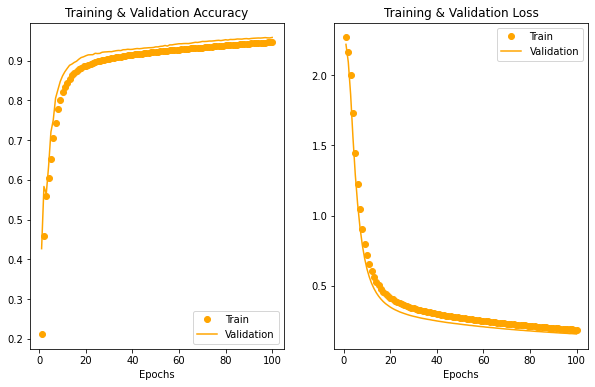

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
plot_accuracy(history_intermediate, ax[0], color='orange')
plot_loss(history_intermediate, ax[1], color='orange')

# Deep Network
* Rough Heuristic
  * 2-4 Hidden layers to start
  * Reduce layers -> How does validation error respond?
    * Reduces Error = Good, fewer layers trains faster
    * Increases Error = Reverse, you need the capacity
  * Increase layers --> What happens to validation error?
    * Reduces Error -> Try another layer
    * Increases Error = Reverse, you're likely moving into overfitting regime
* What does more layers say about your problem?
  * More abstract ground truth
  * You expect there are higher level representations in your problem
  * For example - shapes (edges -> corners -> composites)

In [60]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


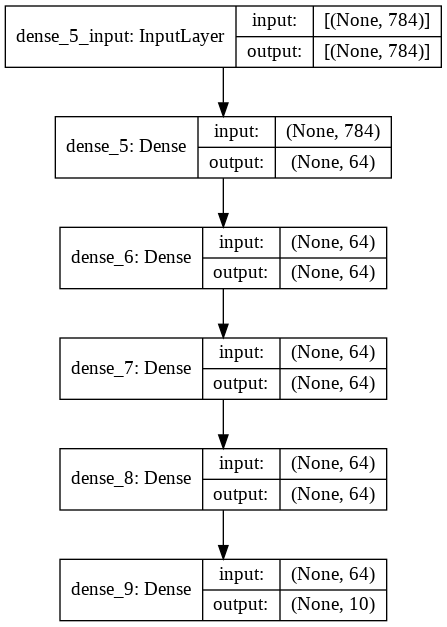

In [62]:
keras.utils.plot_model(model, show_shapes=True)

In [63]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
history_deep = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/100
844/844 [==============================] - 3s 3ms/step - loss: 2.3064 - accuracy: 0.1110 - val_loss: 2.3018 - val_accuracy: 0.1113
Epoch 2/100
844/844 [==============================] - 2s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 3/100
844/844 [==============================] - 2s 3ms/step - loss: 2.3014 - accuracy: 0.1127 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 4/100
844/844 [==============================] - 2s 3ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1050
Epoch 5/100
844/844 [==============================] - 2s 2ms/step - loss: 2.3010 - accuracy: 0.1126 - val_loss: 2.3012 - val_accuracy: 0.1050
Epoch 6/100
844/844 [==============================] - 2s 3ms/step - loss: 2.3007 - accuracy: 0.1135 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 7/100
844/844 [==============================] - 2s 3ms/step - loss: 2.3005 - accuracy: 0.1132 - val_loss: 2.3010 - val_accuracy: 0.1050

In [65]:
loss_deep, accuracy_deep = model.evaluate(X_test, y_test)
results_df.loc['Deep']= [loss_deep, accuracy_deep]
print(f'Test Loss {loss_deep}, Accuracy {accuracy_deep}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.9157
Test Loss 0.3333643078804016, Accuracy 0.9157000184059143


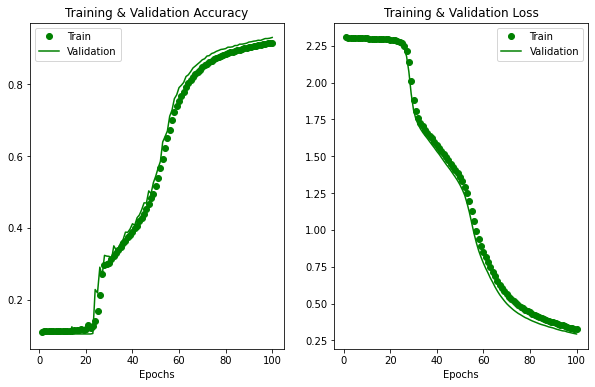

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
plot_accuracy(history_deep, ax[0], color='green')
plot_loss(history_deep, ax[1], color='green')

# Comparison

In [67]:
results_df

,Loss,Accuracy
Shallow,0.193352,0.9444
Intermediate,0.184935,0.9459
Deep,0.333364,0.9157


## Loss

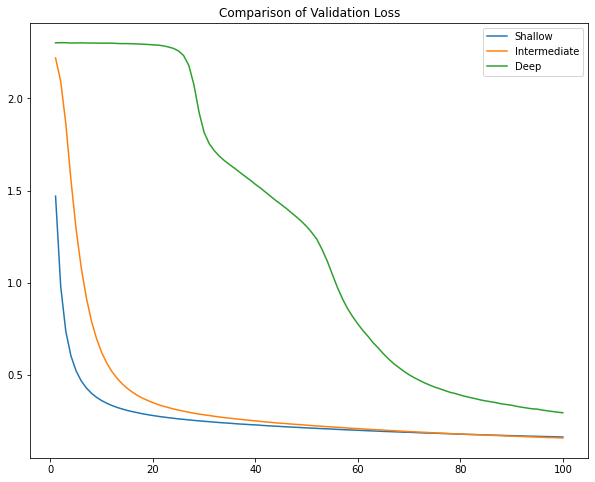

In [68]:
shallow_loss      = history_shallow.history['val_loss']
intermediate_loss = history_intermediate.history['val_loss']
deep_loss         = history_deep.history['val_loss']
ranged            = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, shallow_loss, label='Shallow')
plt.plot(ranged, intermediate_loss, label='Intermediate')
plt.plot(ranged, deep_loss, label='Deep')
plt.title('Comparison of Validation Loss')
plt.legend()
plt.show()

## Accuracy

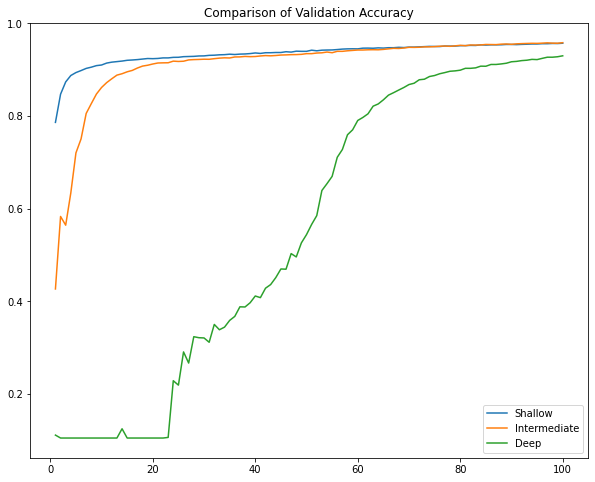

In [69]:
shallow_acc      = history_shallow.history['val_accuracy']
intermediate_acc = history_intermediate.history['val_accuracy']
deep_acc         = history_deep.history['val_accuracy']
ranged           = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, shallow_acc, label='Shallow')
plt.plot(ranged, intermediate_acc, label='Intermediate')
plt.plot(ranged, deep_acc, label='Deep')
plt.title('Comparison of Validation Accuracy')
plt.legend()
plt.show()

# Activations
* In the previous example we used a sigmoid.
* Sigmoids can saturate when their values are close to 0 and 1 making learning slow
* Retrain the deep network with a reLu

![](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)

In [70]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history_deep_relu = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size)

Epoch 1/100
844/844 [==============================] - 3s 3ms/step - loss: 1.2315 - accuracy: 0.6376 - val_loss: 0.4319 - val_accuracy: 0.8812
Epoch 2/100
844/844 [==============================] - 2s 2ms/step - loss: 0.4043 - accuracy: 0.8834 - val_loss: 0.2825 - val_accuracy: 0.9177
Epoch 3/100
844/844 [==============================] - 2s 2ms/step - loss: 0.3165 - accuracy: 0.9068 - val_loss: 0.2359 - val_accuracy: 0.9337
Epoch 4/100
844/844 [==============================] - 2s 2ms/step - loss: 0.2692 - accuracy: 0.9212 - val_loss: 0.2006 - val_accuracy: 0.9442
Epoch 5/100
844/844 [==============================] - 2s 2ms/step - loss: 0.2360 - accuracy: 0.9305 - val_loss: 0.1850 - val_accuracy: 0.9472
Epoch 6/100
844/844 [==============================] - 2s 2ms/step - loss: 0.2100 - accuracy: 0.9377 - val_loss: 0.1647 - val_accuracy: 0.9548
Epoch 7/100
844/844 [==============================] - 2s 2ms/step - loss: 0.1904 - accuracy: 0.9439 - val_loss: 0.1502 - val_accuracy: 0.9587

In [74]:
loss_deep_relu, accuracy_deep_relu = model.evaluate(X_test, y_test)
results_df.loc['Deep - Relu']= [loss_deep_relu, accuracy_deep_relu]
print(f'Test Loss {loss_deep_relu}, Accuracy {accuracy_deep_relu}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1253 - accuracy: 0.9750
Test Loss 0.12526196241378784, Accuracy 0.9750000238418579


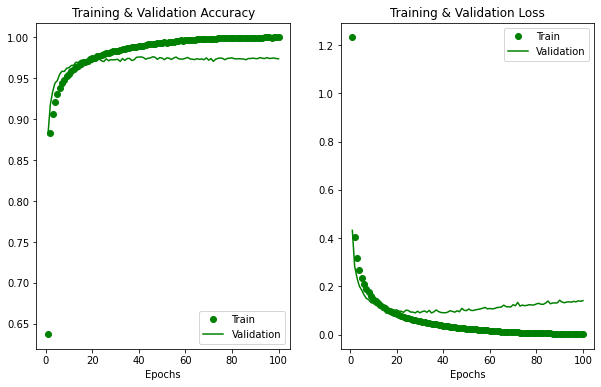

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
plot_accuracy(history_deep_relu, ax[0], color='green')
plot_loss(history_deep_relu, ax[1], color='green')

## Comparison

In [76]:
results_df

,Loss,Accuracy
Shallow,0.193352,0.9444
Intermediate,0.184935,0.9459
Deep,0.333364,0.9157
Deep - Relu,0.125262,0.9750


## Accuracy
* Relu was able to back propagate errors much more efficiently compared
* We reached optimum in under 15 epochs with Relu Activation

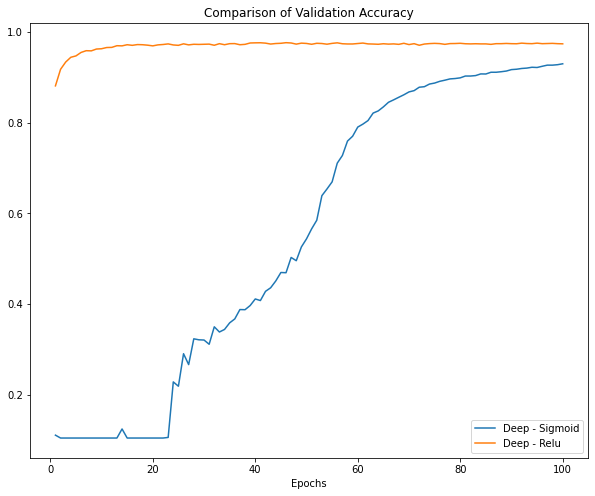

In [78]:
deep_acc_relu    = history_deep_relu.history['val_accuracy']
deep_acc         = history_deep.history['val_accuracy']
ranged           = range(1, epochs + 1)

plt.figure(figsize=(10,8))
plt.plot(ranged, deep_acc, label='Deep - Sigmoid')
plt.plot(ranged, deep_acc_relu, label='Deep - Relu')
plt.title('Comparison of Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.show()


# Closing
* We built models on the MNIST dataset
* We used Dense connections and varied the depth of the layers
* We showed the impact of activation function
  * Sigmoid is inefficient due to neuron saturation
  * reLu was dramatically more effective on the deep layer model
* There are other improvements to explore
  * Weight Initialization
  * Optimizer (Momentum, AdaGrad, RMSProp, Adam)
  * Learning Rates (Schedule, Adaptive, One Cycle)
  * Batch Normalization
  * Regularization
* There are other models superior to Densely connected layers for computer vision
  * Convolutional layers
  * Pretrained architectures with Fine Tuning